In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [3]:
def get_results(txt_file):
    # Using readlines()
    file1 = open(txt_file, 'r')
    Lines = file1.readlines()
    results = []

    for line in Lines:
        if line.startswith("epoch:"):
            elements = line.split(', ')
            epoch = int(elements[0].split(':')[1])
            step = int(elements[1].split(':')[1])
            time = float(elements[2].split(':')[1])
            train_loss = float(elements[3].split(':')[1])
            valid_loss = float(elements[4].split(':')[1])
            train_acc = float(elements[5].split(':')[1])
            valid_acc = float(elements[6].split(':')[1])

            results.append([epoch, step, time, train_loss, valid_loss, train_acc, valid_acc])

    results = np.array(results)
    return results

In [4]:
def generate_aggregated_plots(log_files):
    plt.figure(figsize=(12, 8))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'brown']

    for i, log_file in enumerate(log_files):
        results = get_results(log_file)
        plt.plot(results[:, 1], results[:, 6], linewidth=4.0, c=colors[i])
        plt.plot(results[:, 1], results[:, 5], '--', linewidth=2.0, c=colors[i])

    plt.xlabel('Optimizer steps')
    plt.ylabel('Accuracy')
    plt.grid(True)
    legend_labels = []
    for i in range(1, len(log_files) + 1):
        legend_labels.append(f'Log {i} Validation')
        legend_labels.append(f'Log {i} Training')
    plt.legend(legend_labels, fontsize='small')
    plt.savefig('accuracy_44019_batchsize.png') #revise

    plt.figure(figsize=(12, 8))

    for i, log_file in enumerate(log_files):
        results = get_results(log_file)
        plt.plot(results[:, 1], results[:, 4], linewidth=4.0, c=colors[i])
        plt.plot(results[:, 1], results[:, 3], '--', linewidth=2.0, c=colors[i])

    plt.xlabel('Optimizer steps')
    plt.ylabel('Perplexity')
    plt.grid(True)
    legend_labels = []
    for i in range(1, len(log_files) + 1):
        legend_labels.append(f'Log {i} Validation')
        legend_labels.append(f'Log {i} Training')
    plt.legend(legend_labels, fontsize='small')
    plt.savefig('loss_44019_batchsize.png') #revise

In [5]:
# Define a directory where your log files are located
log_files_dir = './Train_44019_output/adjust_hyper'

# Get a list of log files in the directory
log_files = [os.path.join(log_files_dir, f'log{idx}.txt') for idx in range(2, 7)]  # Assuming you have 10 log files (adjust the range as needed)

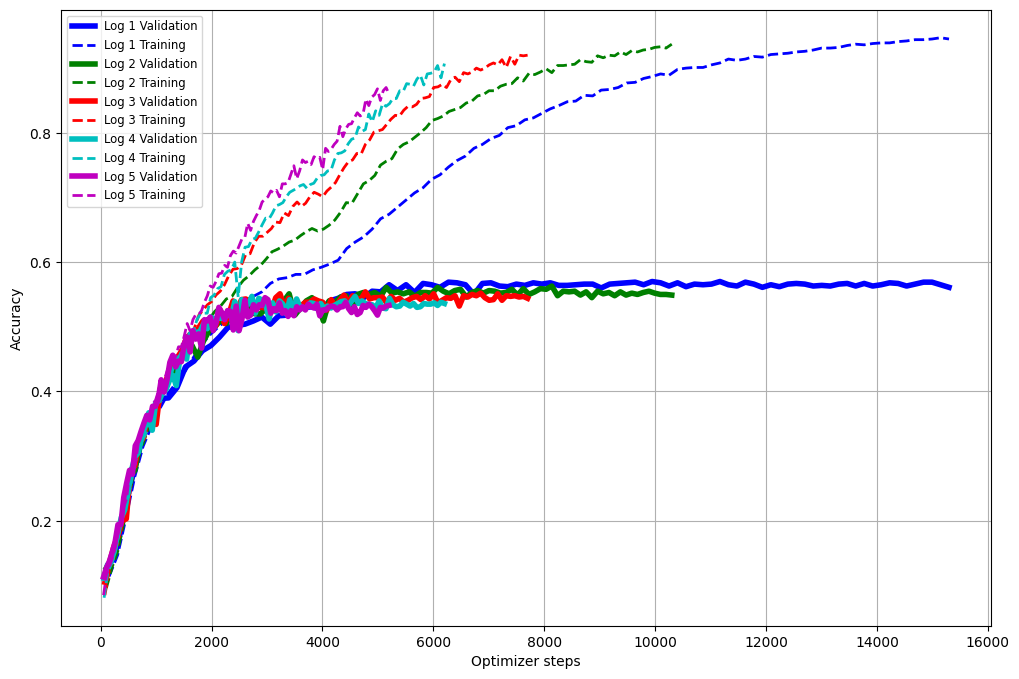

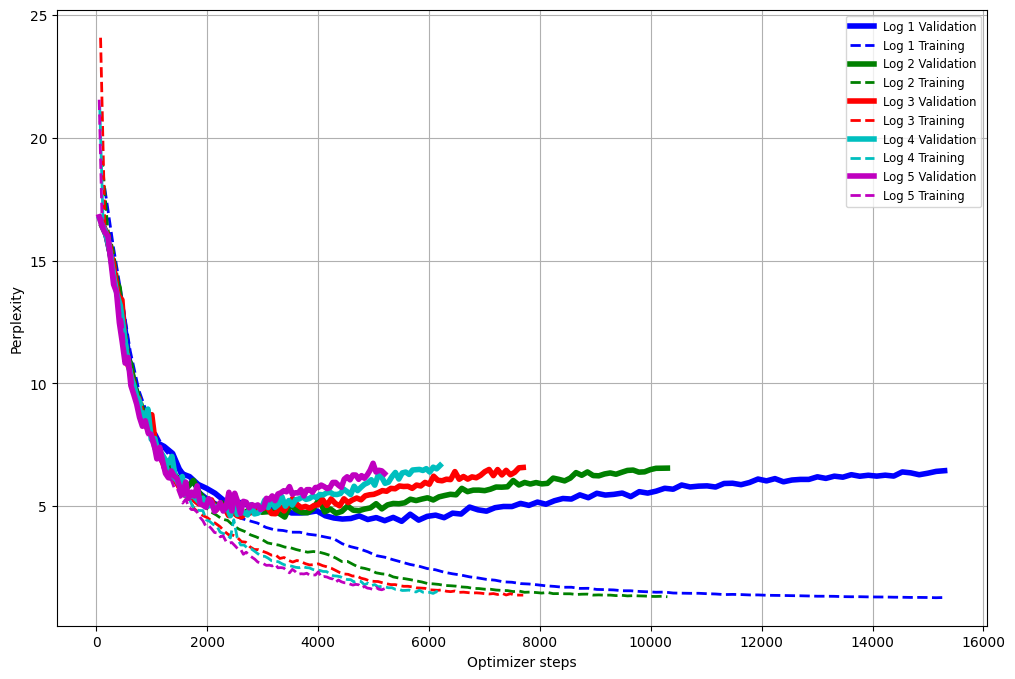

In [6]:
generate_aggregated_plots(log_files)